In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob


In [2]:
df=pd.read_csv("blogs_categories.csv")
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [5]:
# Data preprocessing
# Download NLTK resources
nltk.download("punkt")
nltk.download("stopwords")

# Define function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into text
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Apply preprocessing to the 'Data' column
df['Data'] = df['Data'].apply(preprocess_text)

# Explore the preprocessed data
print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


   Unnamed: 0                                               Data       Labels
0           0  xref cantaloupesrvcscmuedu altatheism49960 alt...  alt.atheism
1           1  xref cantaloupesrvcscmuedu altatheism51060 alt...  alt.atheism
2           2  newsgroups altatheism path cantaloupesrvcscmue...  alt.atheism
3           3  xref cantaloupesrvcscmuedu altatheism51120 alt...  alt.atheism
4           4  xref cantaloupesrvcscmuedu altatheism51121 soc...  alt.atheism


In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Data'], df['Labels'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.89825
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.75       173
           comp.graphics       0.88      0.91      0.89       179
 comp.os.ms-windows.misc       0.93      0.88      0.91       226
comp.sys.ibm.pc.hardware       0.85      0.86      0.85       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.97      0.95      0.96       186
            misc.forsale       0.91      0.78      0.84       190
               rec.autos       0.92      0.94      0.93       203
         rec.motorcycles       1.00      0.97      0.98       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.90      0.98      0.94       200
         sci.electronics       0.94      0.90      0.92       227
                 sci.med       1.00      0.95      0.98  

In [11]:
# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Explore the sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)


Positive    14255
Negative     5724
Neutral        18
Name: Sentiment, dtype: int64


Accuracy: 0.89825
Precision: 0.8972595994963003
Recall: 0.89825
F1 Score: 0.8966535167969608
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                    285        0       715
comp.graphics                  263        1       736
comp.os.ms-windows.misc        259        0       741
comp.sys.ibm.pc.hardware       255        2       743
comp.sys.mac.hardware          274        0       726
comp.windows.x                 282        5       713
misc.forsale                   231        0       769
rec.autos                      254        2       744
rec.motorcycles                345        0       655
rec.sport.baseball             312        1       687
rec.sport.hockey               347        1       652
sci.crypt                      264        0       736
sci.electronics                252        0       748
sci.med                        282        2       716
sci.space                      276        1

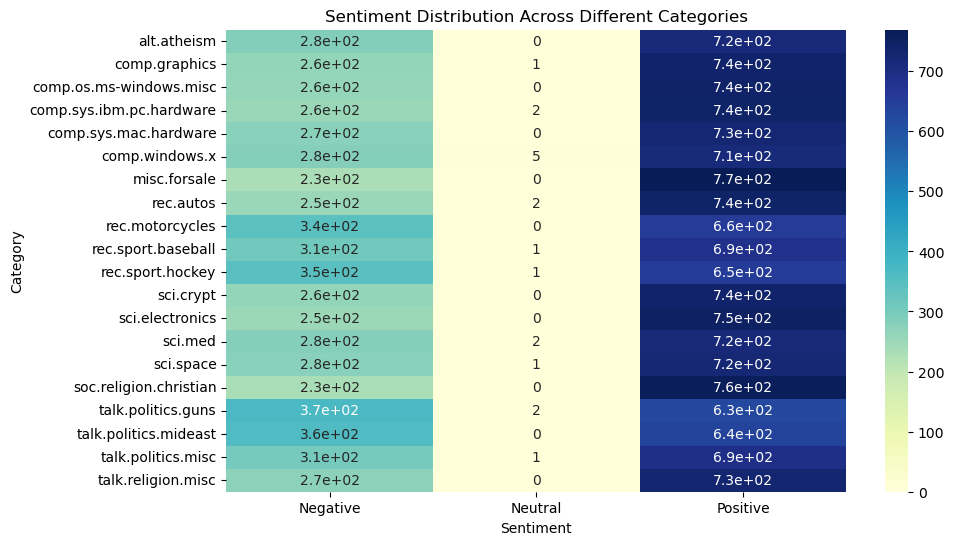

Findings:
1. The Naive Bayes classifier achieved an accuracy of 0.89825


In [13]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the performance of the Naive Bayes classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Analyze the sentiment distribution across different categories
sentiment_category_counts = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
print(sentiment_category_counts)

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_category_counts, annot=True, cmap="YlGnBu")
plt.title('Sentiment Distribution Across Different Categories')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.show()

# Discussion of findings and challenges
print("Findings:")
print("1. The Naive Bayes classifier achieved an accuracy of", accuracy)